# Assignment 2


In [1]:
# Assignment 2
# Personal Loan Prediction Using Trees
# Use the UniversalBank.csv dataset for this assignment

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.simplefilter("ignore")


In [5]:
# Load the data from the file UniversalBank.csv. (2)
df = pd.read_csv("UniversalBank.csv")
print(df.head())
#print(df.isnull().sum()) 
# No null values, no need for data wrangling for null values

# •	What is the target variable? (2)
print("Target variable is : Personal Loan")



   Row  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1   25           1      49     91107       4    1.6          1         0   
1    2   45          19      34     90089       3    1.5          1         0   
2    3   39          15      11     94720       1    1.0          1         0   
3    4   35           9     100     94112       1    2.7          2         0   
4    5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
Target variable is : Personal Loan


In [6]:
# •	Remove the attributes Row and Zip code. (3)
df = df.drop(columns=['Row', 'ZIP Code'])
print(df.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [10]:
## All columns except Personal Loan are descriptive features
descriptive_features = df[["Age",  "Experience"  ,"Income",  "Family",  "CCAvg",  "Education",  "Mortgage","Securities Account"  ,"CD Account",  "Online",  "CreditCard"]]
target_feature = df[["Personal Loan"]]
target_feature

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [14]:
# partition dataset into 70-30
# •	Partition the dataset:
# 	•	random_state = 42 (1)
# 	•	Partitions 70/30 (1)
# 	•	Make sure to stratify! (1)


# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.3,random_state = 42,stratify=target_feature)
#X_train.shape,y_train.shape,X_test.shape

((3500, 11), (3500, 1), (1500, 11))

In [16]:
#How many of the cases in the training partition represented people who accepted offers of a personal loan? (3)

count = y_train['Personal Loan'].sum()
print('count of people in training set who accepted offers of a personal loan:', count)

count of people in training set who accepted offers of a personal loan: 336


Model accuracy score with criterion entropy: 0.9854


[Text(0.42, 0.9166666666666666, 'X[2] <= 94.5\nentropy = 0.456\nsamples = 3500\nvalue = [3164, 336]'),
 Text(0.12, 0.75, 'X[4] <= 2.95\nentropy = 0.07\nsamples = 2597\nvalue = [2575, 22]'),
 Text(0.08, 0.5833333333333334, 'entropy = 0.0\nsamples = 2454\nvalue = [2454, 0]'),
 Text(0.16, 0.5833333333333334, 'X[8] <= 0.5\nentropy = 0.619\nsamples = 143\nvalue = [121, 22]'),
 Text(0.08, 0.4166666666666667, 'X[0] <= 27.0\nentropy = 0.528\nsamples = 134\nvalue = [118, 16]'),
 Text(0.04, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.12, 0.25, 'X[4] <= 3.65\nentropy = 0.488\nsamples = 132\nvalue = [118, 14]'),
 Text(0.08, 0.08333333333333333, 'entropy = 0.661\nsamples = 70\nvalue = [58, 12]'),
 Text(0.16, 0.08333333333333333, 'entropy = 0.206\nsamples = 62\nvalue = [60, 2]'),
 Text(0.24, 0.4166666666666667, 'X[4] <= 4.2\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.28, 0.25, 'X[6] <= 38.0\nentropy = 0.811

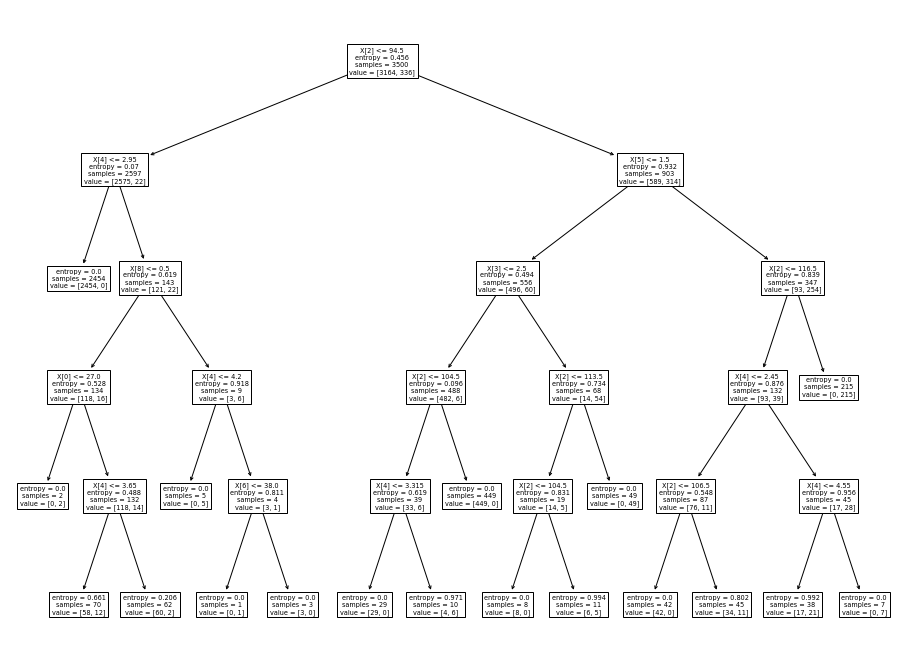

In [28]:
# Plot the classification tree Use entropy criterion. Max_depth = 5, random_state = 42. (4)

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_train)
plt.figure(figsize=(16,12))
tree.plot_tree(clf_en.fit(X_train, y_train)) 



acceptors classified as non-acceptors in training set:  21
Non-Acceptors classified as acceptors in training set:  30


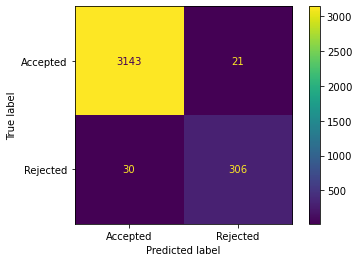

In [32]:
# On the training partition, how many acceptors did the model classify as non-acceptors? (3)
# On the training partition, how many non-acceptors did the model classify as acceptors? (3)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_en)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Accepted','Rejected'])
cmd.plot()

print('acceptors classified as non-acceptors in training set: ',cm[0][1])
print('Non-Acceptors classified as acceptors in training set: ',cm[1][0])

In [33]:
# What was the accuracy on the training partition? (2)

# Accuracy of Training set
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_en)))

Model accuracy score with criterion entropy: 0.9854


In [34]:
y_pred_en_test = clf_en.predict(X_test)
# Accuracy of Testing set
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_test)))

Model accuracy score with criterion entropy: 0.9847


   Row  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1   25           1      49     91107       4    1.6          1         0   
1    2   45          19      34     90089       3    1.5          1         0   
2    3   39          15      11     94720       1    1.0          1         0   
3    4   35           9     100     94112       1    2.7          2         0   
4    5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
Target variable is : Personal Loan
   Age  Experience  Income  Family  CCAvg  Education

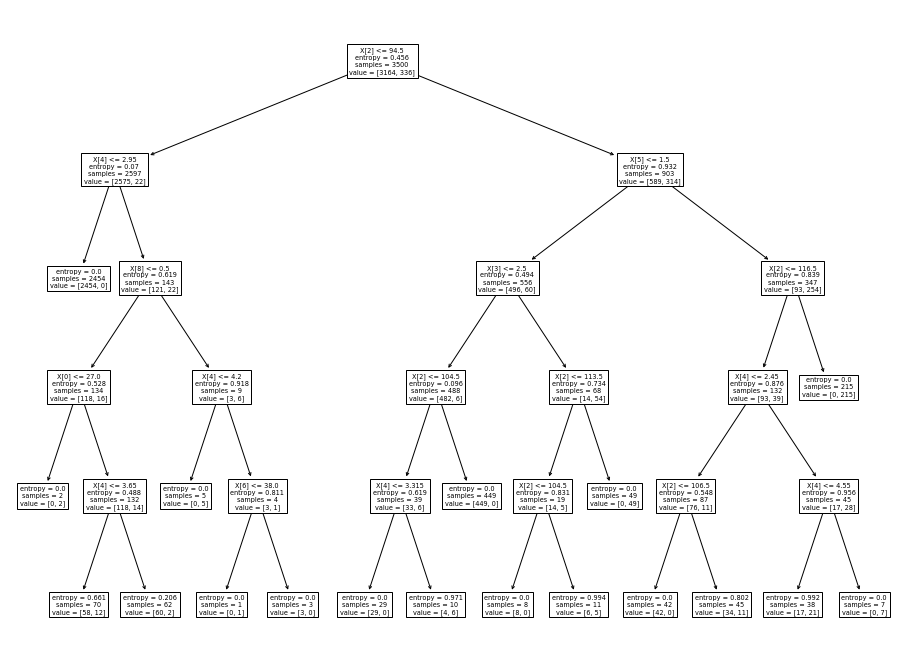

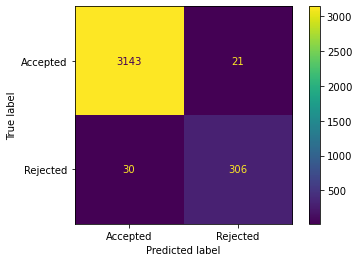

In [36]:
# Assignment 2
# Personal Loan Prediction Using Trees
# Use the UniversalBank.csv dataset for this assignment

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.simplefilter("ignore")

def main():
    # Load the data from the file UniversalBank.csv. (2)
    df = pd.read_csv("UniversalBank.csv")
    print(df.head())
    #print(df.isnull().sum()) 
    # No null values, no need for data wrangling for null values

    # •	   What is the target variable? (2)
    print("Target variable is : Personal Loan")


    # •	Remove the attributes Row and Zip code. (3)
    df = df.drop(columns=['Row', 'ZIP Code'])
    print(df.head())
    ## All columns except Personal Loan are descriptive features
    descriptive_features = df[["Age",  "Experience"  ,"Income",  "Family",  "CCAvg",  "Education",  "Mortgage","Securities Account"  ,"CD Account",  "Online",  "CreditCard"]]
    target_feature = df[["Personal Loan"]]
    target_feature
    # partition dataset into 70-30
    # •	Partition the dataset:
    # 	•	random_state = 42 (1)
    # 	•	Partitions 70/30 (1)
    # 	•	Make sure to stratify! (1)


    # train test split
    X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.3,random_state = 42,stratify=target_feature)
    #X_train.shape,y_train.shape,X_test.shape
    #How many of the cases in the training partition represented people who accepted offers of a personal loan? (3)

    count = y_train['Personal Loan'].sum()
    print('count of people in training set who accepted offers of a personal loan:', count)
    # Plot the classification tree Use entropy criterion. Max_depth = 5, random_state = 42. (4)

    clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
    # fit the model
    clf_en.fit(X_train, y_train)
    y_pred_en = clf_en.predict(X_train)
    plt.figure(figsize=(16,12))
    tree.plot_tree(clf_en.fit(X_train, y_train)) 


    # On the training partition, how many acceptors did the model classify as non-acceptors? (3)
    # On the training partition, how many non-acceptors did the model classify as acceptors? (3)

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    cm = confusion_matrix(y_train, y_pred_en)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Accepted','Rejected'])
    cmd.plot()

    print('acceptors classified as non-acceptors in training set: ',cm[0][1])
    print('Non-Acceptors classified as acceptors in training set: ',cm[1][0])
    # What was the accuracy on the training partition? (2)

    # Accuracy of Training set
    print('Model accuracy score with criterion entropy of Training set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_en)))
    y_pred_en_test = clf_en.predict(X_test)
    # Accuracy of Testing set
    print('Model accuracy score with criterion entropy of Test set: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_test)))

if __name__ == '__main__':
    main()
